# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 


Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.



In [200]:
# Suppressing Warnings

import warnings
warnings.filterwarnings('ignore')

#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

# Data Understanding

In [201]:
#importing the dataset

leads_df =pd.read_csv("Leads.csv")
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [202]:
leads_df.shape

(9240, 37)

In [203]:
#Statstical analysis of numerical columns
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [204]:
# Column types and details
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

We can see maximum columns are of object type and rest being int,float data types

## Checking the 'Prospect ID' & 'Lead Number' variables

In [205]:
# Checking if this is a unique ID with no duplicates

leads_df.duplicated(subset = 'Prospect ID').sum()

0

In [206]:
# Checking if this is a unique ID with no duplicates
leads_df.duplicated(subset = 'Lead Number').sum()

0

### Data Value Count Check

In [207]:
# Checking the value_counts in every variables to understand the unique values in each column  better
#Leaving the First two columns as we can see these already have all unqiue values
leads_col=leads_df.iloc[:,2:]

for col in leads_col:
    print(leads_col[col].value_counts(), '\n')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
testone                 1
welearnblog_Home        1
Pay per Click Ads       1
youtubechannel          1
NC_EDM                  1
blog                    1
WeLearn                 1
Name: Lead Source, dtype: int64 

No     8506
Yes     734
Name: Do Not Email, dtype: int64 

No     9238
Yes       2
Name: Do Not Call, dtype: int64 

0    5679
1    3561
Name: Converted, dtype: int64 

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5

Name: Asymmetrique Profile Score, dtype: int64 

No    9240
Name: I agree to pay the amount through cheque, dtype: int64 

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64 

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Resubscribed to emails             1
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Name: Last Notable Activity, dtype: int64 



From the value_counts, we could see that the below variables has highly IMBALANCED data. So these will not significantly contribute to our model results. Hence we will tag them to be dropped. - Magazine - Newspaper Article - X Education Forums - Newspaper - Digital Advertisement - Through Recommendations - Receive More Updates About Our Courses - Update me on Supply Chain Content - Get updates on DM Content - I agree to pay the amount through cheque - What matters most to you in choosing a course - Search - Do Not Call - Do Not Email - Country - What is your current occupation

In [208]:
drop_list = ['Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
                'Update me on Supply Chain Content', 'Get updates on DM Content',
                'I agree to pay the amount through cheque', 'Do Not Call', 'Do Not Email','Search', 
                'What matters most to you in choosing a course','Country','What is your current occupation']


drop_list

['Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Do Not Email',
 'Search',
 'What matters most to you in choosing a course',
 'Country',
 'What is your current occupation']

In [209]:
#'Prospect ID','Lead Number' seems to be purely unique ID's, and will not make any significant contributions to our model results.
#Adding these two to our column drop list

drop_list.append('Prospect ID')
drop_list.append('Lead Number')
drop_list

['Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Do Not Email',
 'Search',
 'What matters most to you in choosing a course',
 'Country',
 'What is your current occupation',
 'Prospect ID',
 'Lead Number']

# Exploratory Data Analysis

### Data Imbalance Percentage Check

In [210]:
# % of of Non Converted and Converted Leads in the Dataset
leads_df.Converted.value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

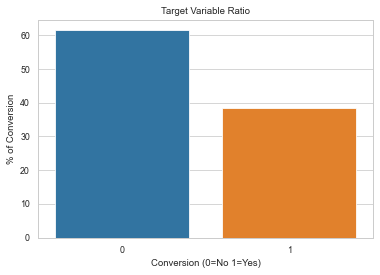

In [211]:
# Plot representing the Imbalance Percentage in leads_df DataFrame

ax = sns.barplot(x="Converted", y="Converted",
                 data=leads_df, estimator=lambda x: len(x) / len(leads_df) * 100)

plt.title('Target Variable Ratio')
plt.xlabel('Conversion (0=No 1=Yes)')
plt.xticks(rotation=0)
plt.ylabel('% of Conversion')
plt.show()

We can see from above that our target variable Converted has 62:38 ratio, and seems to be properly balanced with respect to the conversion ratio

## Data Cleaning & Treatment:

In our initial analysis (value_counts) , we saw that there are many variables having 'Select' as the categorical values. These values seem to be values not added by customer or  has clearly missed to add, we will consider them as NULL values. We will convert all 'Select' to 'NaN'

In [212]:
#Variables like city,Specialization,How did you hear about X Education, have Select as a value
leads_df.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [213]:
leads_df.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [214]:
leads_df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [215]:
# Replacing the 'Select with NaN'

leads_df = leads_df.replace('Select', np.nan)

In [216]:
leads_df.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [217]:
leads_df.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [218]:
leads_df['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [219]:
#checking percentage of null values in each columns

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [220]:
#dropping cols with more than 40% missing values

col=leads_df.columns

for i in col:
    if((100*(leads_df[i].isnull().sum()/len(leads_df.index))) >= 40):
        leads_df.drop(i, axis=1, inplace = True)

In [221]:
leads_df.shape


(9240, 30)

In [222]:
#checking percentage of null values in each columns

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

# Exploring Categorical Variables

In [223]:
#Checking overall columns list to analyse

leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [224]:
#Handling one by one columns starting with Lead Origin Column

leads_df['Lead Origin'].value_counts()


Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

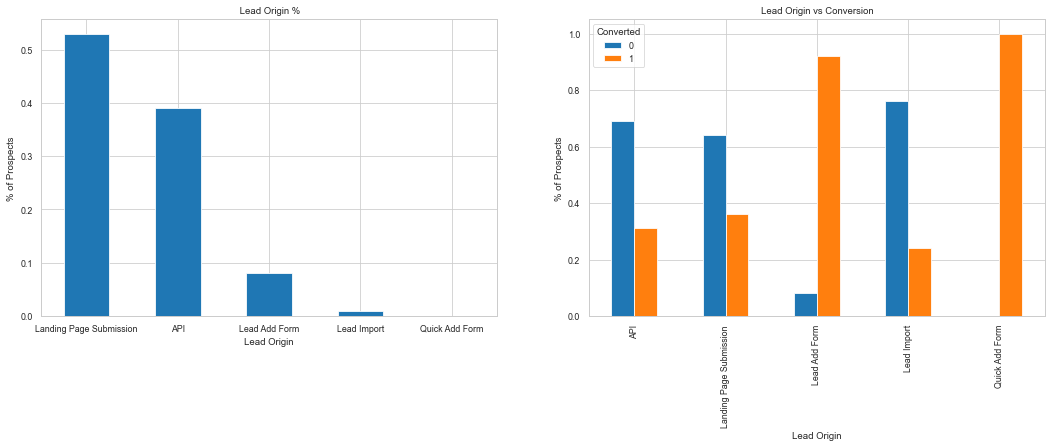

In [225]:
# Plotting w.r.t self as well as target variable

plt.figure(figsize=(18, 12))

# Univariate Analysis 
ax= plt.subplot(221)
round(leads_df['Lead Origin'].value_counts(normalize=True),2).plot(kind='bar')
plt.title(' Lead Origin %')
plt.xlabel('Lead Origin')
plt.xticks(rotation=0)
plt.ylabel('% of Prospects')


# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(leads_df['Lead Origin'],leads_df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)

plt.title(' Lead Origin %')
plt.title('Lead Origin vs Conversion')
plt.xlabel('Lead Origin')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

plt.show()

Univariate Analysis states that ~53% of the Lead Origin is from 'Landing Page Submission' followed by ~39% from API - Bivariate Analysis states that 'Landing Page Submission' has 36% of Conversion and 'API' has 31% of Conversion. All calculations shown above.

In [226]:
# Checking unique value counts 

leads_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
testone                 1
welearnblog_Home        1
Pay per Click Ads       1
youtubechannel          1
NC_EDM                  1
blog                    1
WeLearn                 1
Name: Lead Source, dtype: int64

#### Merging less frequent values of 'Lead Source' to 'Others' category
Looking at the proportions of various values in 'Lead Source' We see values with low occurence ,merging them into a new category 'Others' will help us in a better analysis
We will also merge 'google' to 'Google' as this seems like a typo error
From our Null value check, we noted that 'Lead Source' had 36 NULL values.Imputing the NULL values with the MODE imputation, in this case 'Google'.

In [227]:
# Merging 2 Google into one category
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google', 'Google')


# Imputing Null with Others, as it is generally Unknown sources
leads_df['Lead Source'] = leads_df['Lead Source'].replace(np.nan, 'Google')

# Merging low frequency items to Others
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['bing', 'Click2call', 'Press_Release',
                                                   'youtubechannel', 'welearnblog_Home',
                                                   'WeLearn', 'blog', 'Pay per Click Ads',
                                                   'testone', 'NC_EDM', 'Live Chat', 'Facebook', 'Social Media'], 'Others')

In [228]:
leads_df['Lead Source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                78
Name: Lead Source, dtype: int64

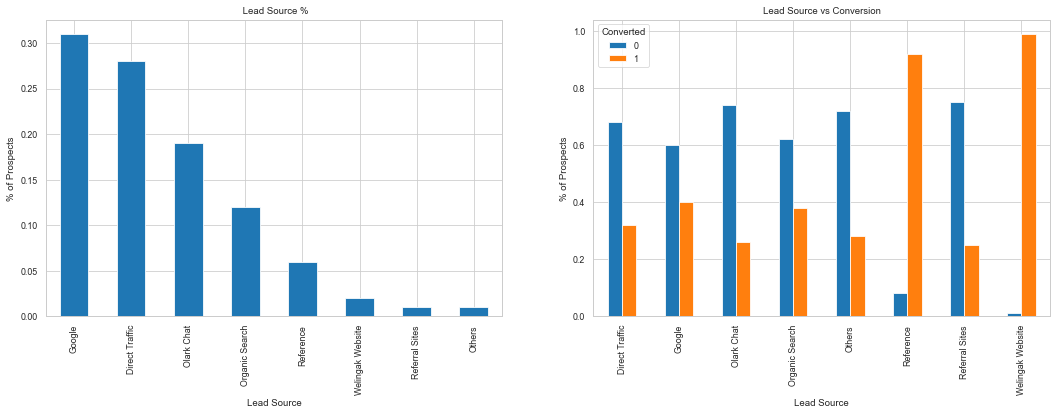

In [229]:
# Plotting w.r.t self as well as target variable

plt.figure(figsize=(18, 12))

# Univariate Analysis 
ax= plt.subplot(221)
round(leads_df['Lead Source'].value_counts(normalize=True),2).plot(kind='bar')
plt.title(' Lead Source %')
plt.xlabel('Lead Source')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')


# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(leads_df['Lead Source'],leads_df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)

plt.title(' Lead Source %')
plt.title('Lead Source vs Conversion')
plt.xlabel('Lead Source')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

plt.show()

In [230]:
# Checking unique value counts 

round(leads_df['Lead Source'].value_counts(normalize=True),3).sort_values(ascending = False)

Google              0.315
Direct Traffic      0.275
Olark Chat          0.190
Organic Search      0.125
Reference           0.058
Welingak Website    0.015
Referral Sites      0.014
Others              0.008
Name: Lead Source, dtype: float64

Univariate Analysis states that ~31% of the Lead Source is from 'Google' followed by ~28% from 'Direct Traffic' - Bivariate Analysis states that 'Google' as a Lead Source has 40% of Conversion and 'Direct Traffic' has 32% of Conversion. 

In [231]:
#Handling last Activity column

leads_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In 'Last Activity' column from above we could see there are couple of low frequent values in there. We will merge them into a new category 'Others'

'Last Activity' has 103 NULL values. We will impute the NULL values with the MODE imputation, in this case 'Email Opened'.

In [232]:
# Imputing Null with Email Opened as that is the Mode value for Last Activity
leads_df['Last Activity'] = leads_df['Last Activity'].replace(np.nan, 'Email Opened')

In [233]:

# Merging low frequency items to Others
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                   'View in browser link Clicked','Email Received','Email Marked Spam','Resubscribed to emails',
                                                  'Visited Booth in Tradeshow'], 'Others')

In [234]:
leads_df['Last Activity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

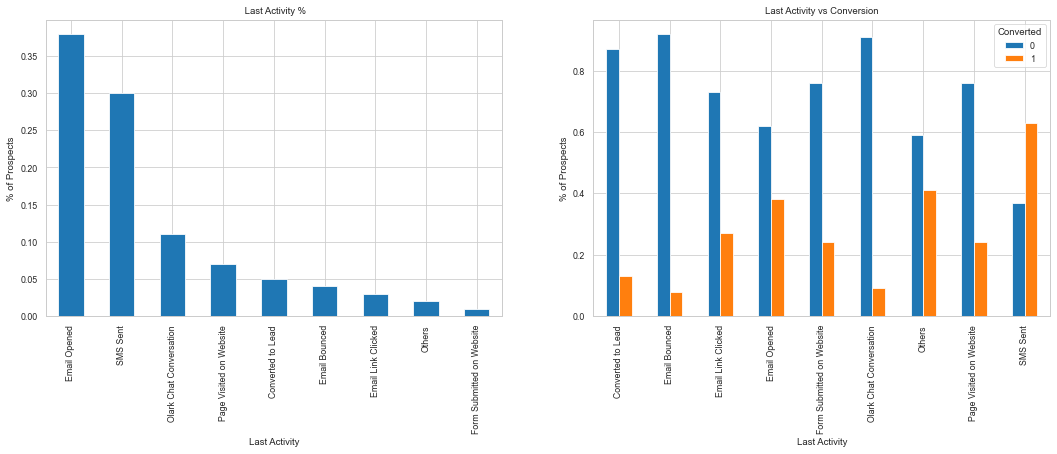

In [235]:
# Plotting analysis of variable with self and target variable

plt.figure(figsize=(18, 12))

# Univariate Analysis 
ax= plt.subplot(221)
round(leads_df['Last Activity'].value_counts(normalize=True),2).plot(kind='bar')
plt.title(' Last Activity %')
plt.xlabel('Last Activity')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(leads_df['Last Activity'],leads_df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Last Activity vs Conversion')
plt.xlabel('Last Activity')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')


plt.show()

In [236]:
round(leads_df['Last Activity'].value_counts(normalize=True),3).sort_values(ascending = False)

Email Opened                 0.383
SMS Sent                     0.297
Olark Chat Conversation      0.105
Page Visited on Website      0.069
Converted to Lead            0.046
Email Bounced                0.035
Email Link Clicked           0.029
Others                       0.022
Form Submitted on Website    0.013
Name: Last Activity, dtype: float64

Univariate Analysis states that ~38% of the Last Activity is from 'Email Opened' followed by ~28% from 'SMS Sent' - Bivariate Analysis states that 'Email Opened' as a Last Activity has 38% of Conversion and 'SMS Sent' has 63% of Conversion. All calculations shown above.

In [237]:
#Handling Specialization columns

leads_df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

From null check we can see high null values for specialization(3380 null values),imputing the NULL values as 'Others' as not selecting a Specialization could mean that the person has not worked in any industry earlier.

Lower proportion values can also be termed into a single value as others

In [238]:
#Imputing null values with others

leads_df['Specialization']=leads_df['Specialization'].replace(np.nan,'Others')

In [239]:
# Merging low frequency values to Others
leads_df['Specialization'] = leads_df['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence'], 'Others')

In [240]:
leads_df['Specialization'].value_counts(normalize=True)

Others                               0.384199
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Name: Specialization, dtype: float64

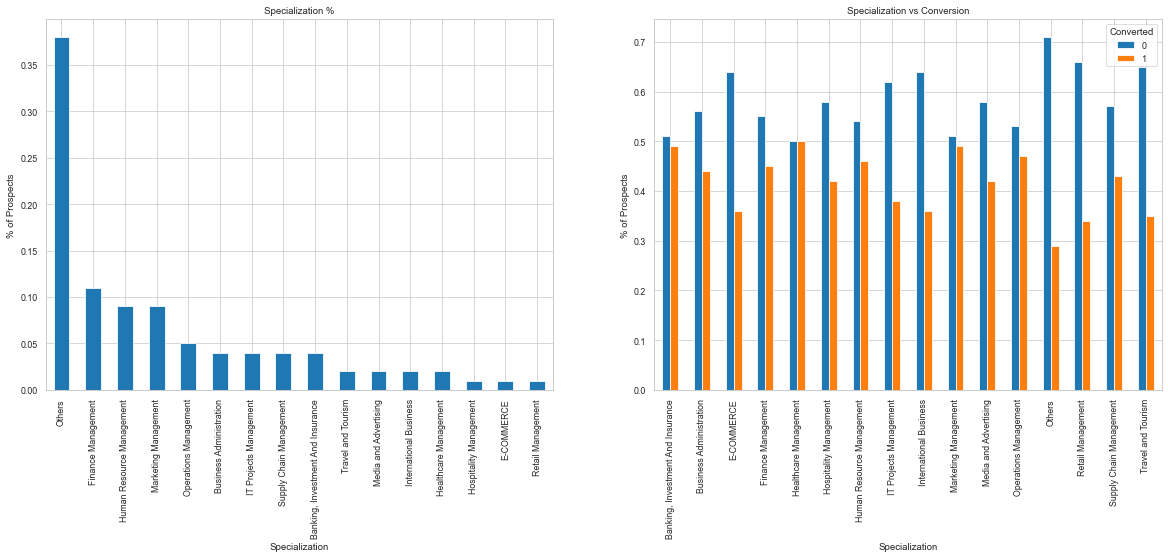

In [241]:
# Plotting Specialization w.r.t self and w.r.t target variable

plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(leads_df['Specialization'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('Specialization %')
plt.xlabel('Specialization')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(leads_df['Specialization'],leads_df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Specialization vs Conversion')
plt.xlabel('Specialization')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')


plt.show()

In [242]:
leads_df['Specialization'].value_counts(normalize=True)

Others                               0.384199
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Name: Specialization, dtype: float64

Univariate Analysis shows that ~39% of the Specialization is from 'Others' category, followed by ~10% from 'Finance Management' - Bivariate Analysis show that 'Finance Management' as a Specialization has 45% of Conversion and 'Human Resource Management' has 46% of Conversion. Banking,Healthcare and Marketing 


In [243]:

leads_df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [244]:
# Imputing Null with Others, as it is generally Unknown sources
leads_df['Tags'] = leads_df['Tags'].replace(np.nan, 'Others')

# Merging low frequency items to Others
leads_df['Tags'] = leads_df['Tags'].replace(['switched off', 'Busy', 'Lost to EINS', 'Not doing further education', 'Interested  in full time MBA',
                                     'Graduation in progress', 'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup',
                                     'number not provided', 'in touch with EINS', 'Lost to Others', 'Want to take admission but has financial problems',
                                     'Still Thinking', 'Interested in Next batch', 'In confusion whether part time or DLP', 'Lateral student',
                                     'Shall take in the next coming month', 'University not recognized', 'Recognition issue (DEC approval)','Closed by Horizzon'
                                     ], 'Others')

In [245]:
leads_df['Tags'].value_counts()

Others                                 4987
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Name: Tags, dtype: int64

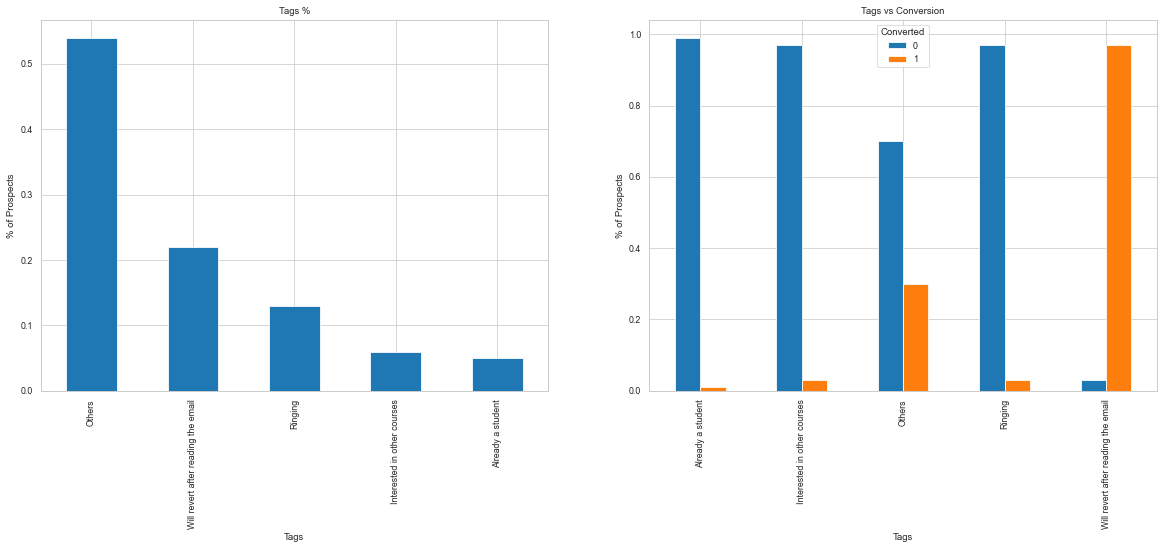

In [246]:

plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(leads_df['Tags'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('Tags %')
plt.xlabel('Tags')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(leads_df['Tags'],leads_df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Tags vs Conversion')
plt.xlabel('Tags')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

plt.show()

In [247]:
leads_df['Tags'].value_counts(normalize=True)

Others                                 0.539719
Will revert after reading the email    0.224242
Ringing                                0.130195
Interested in other courses            0.055519
Already a student                      0.050325
Name: Tags, dtype: float64

Univariate Analysis shows that ~54% of the Tags is from 'Others' category, followed by ~22% from 'Will revert after reading the email' - Bivariate Analysis states that 'Will revert after reading the email' as a Tags has 97% of Conversion and 'Others' has 30% of Conversion. All calculations shown above.

In [248]:
leads_df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [249]:
# Imputing Null with Others, as it is generally Unknown sources
leads_df['City'] = leads_df['City'].replace(np.nan, 'Others')

# Merging low frequency items to Others
leads_df['City'] = leads_df['City'].replace(['Tier II Cities','Other Metro Cities','Other Cities of Maharashtra','Other Cities'], 'Others')

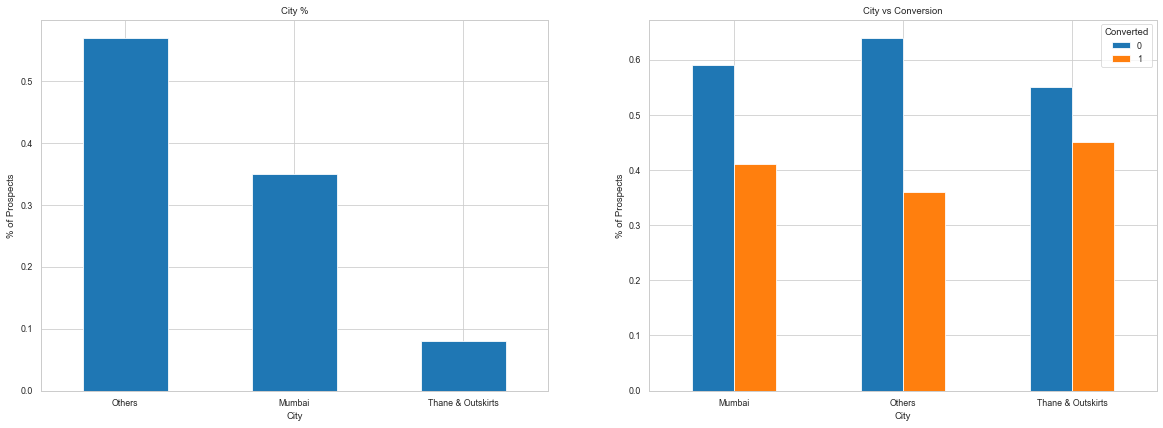

In [250]:
# Plotting w.r.t self and w.r.t target variable

plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(leads_df['City'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('City %')
plt.xlabel('City')
plt.xticks(rotation=0)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(leads_df['City'],leads_df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('City vs Conversion')
plt.xlabel('City')
plt.xticks(rotation=0)
plt.ylabel('% of Prospects')


plt.show()

In [251]:
leads_df['City'].value_counts(normalize=True)

Others               0.569913
Mumbai               0.348701
Thane & Outskirts    0.081385
Name: City, dtype: float64

Univariate Analysis states that ~57% of the City is from 'Others' category, followed by ~35% from 'Mumbai' - Bivariate Analysis states that 'Mumbai' as a City has 41% of Conversion and 'Others' has 36% of Conversion.

In [252]:
# Checking unique value counts 

leads_df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

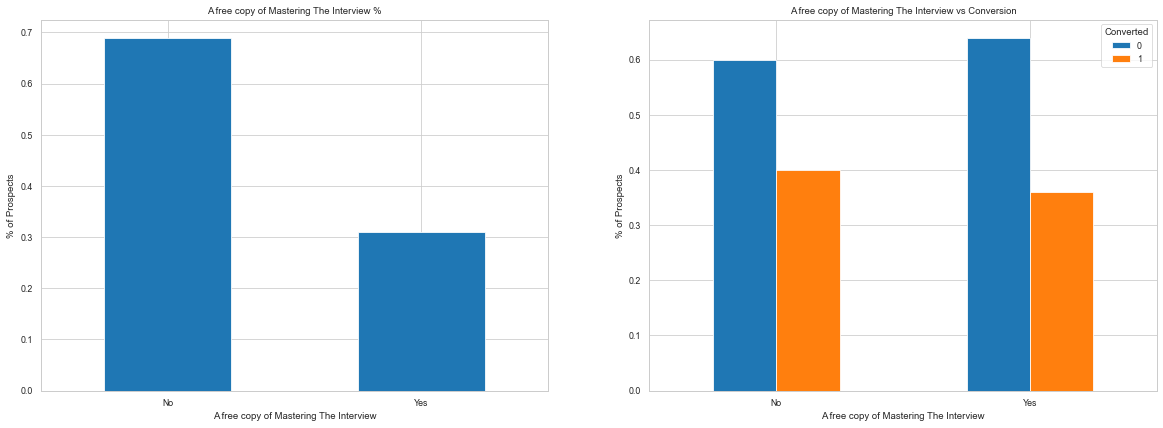

In [253]:
#Ploting the variable w.r.t self and w.r.t target variable

plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(leads_df['A free copy of Mastering The Interview'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('A free copy of Mastering The Interview %')
plt.xlabel('A free copy of Mastering The Interview')
plt.xticks(rotation=0)
plt.ylabel('% of Prospects')


# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(leads_df['A free copy of Mastering The Interview'],leads_df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('A free copy of Mastering The Interview vs Conversion')
plt.xlabel('A free copy of Mastering The Interview')
plt.xticks(rotation=0)
plt.ylabel('% of Prospects')


plt.show()

In [254]:
leads_df['A free copy of Mastering The Interview'].value_counts(normalize=True)

No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64

Univariate Analysis show that ~68% of the customer said they do not need 'A free copy of Mastering The Interview'. - Bivariate Analysis show that only ~36% of the people who said they need 'A free copy of Mastering The Interview' were converted. All calculations shown above.

In [255]:

leads_df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Resubscribed to emails             1
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [256]:
# Merging low frequency items to Others
leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(['Email Bounced', 'Unsubscribed', 'Unreachable','Had a Phone Conversation',
                                                                       'Email Marked Spam', 'Form Submitted on Website','Resubscribed to emails',
                                                                       'View in browser link Clicked', 'Approached upfront','Email Received'], 'Others')

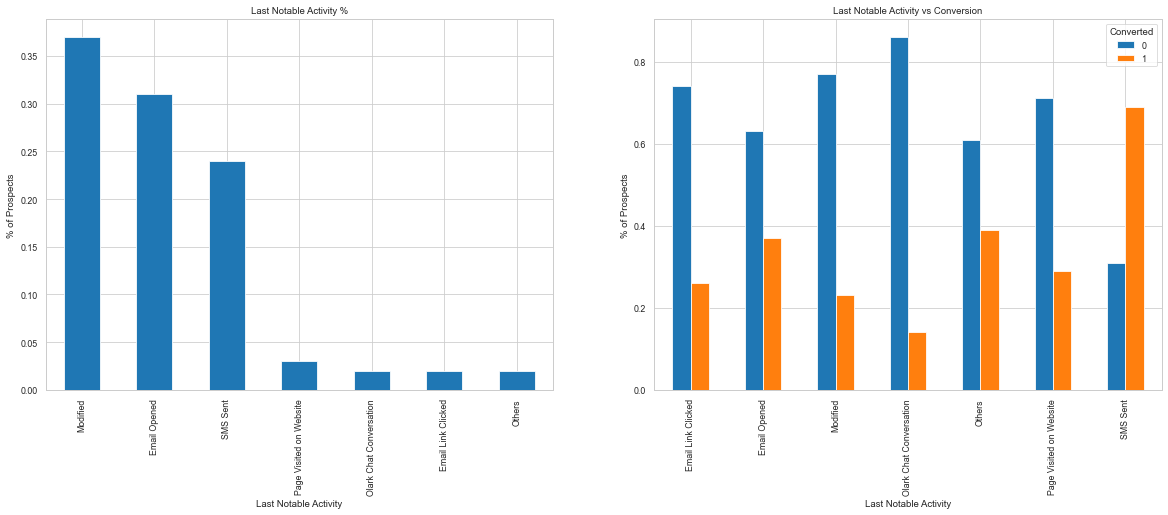

In [257]:
# Plotting w.r.t self as well as w.r.t target variable

plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(leads_df['Last Notable Activity'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('Last Notable Activity %')
plt.xlabel('Last Notable Activity')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(leads_df['Last Notable Activity'],leads_df.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Last Notable Activity vs Conversion')
plt.xlabel('Last Notable Activity')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')


plt.show()

In [258]:
leads_df['Last Notable Activity'].value_counts(normalize=True)

Modified                   0.368723
Email Opened               0.305952
SMS Sent                   0.235065
Page Visited on Website    0.034416
Olark Chat Conversation    0.019805
Email Link Clicked         0.018723
Others                     0.017316
Name: Last Notable Activity, dtype: float64

Univariate Analysis shows that ~37% of the Last Notable Activity is 'Modified' category, followed by ~31% from 'Email Opened' - Bivariate Analysis states that 'Email Opened' has 37% of Conversion and 'Modified' has 23% of Conversion. All calculations shown above.

# Exploring Numerical Variables & Outlier Handling

In [259]:
leads_df.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.025157,0.022223,0.020329,0.058808
Converted,0.025157,1.000000,0.030395,0.362483,-0.003328
TotalVisits,0.022223,0.030395,1.000000,0.221240,0.512125
Total Time Spent on Website,0.020329,0.362483,0.221240,1.000000,0.320361
Page Views Per Visit,0.058808,-0.003328,0.512125,0.320361,1.000000


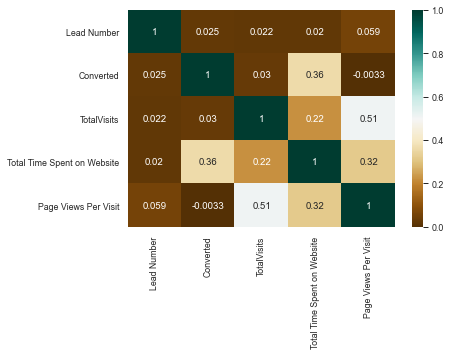

In [260]:
sns.heatmap(leads_df.corr(),annot=True,cmap="BrBG")
plt.show()

From Heat Map we can seethat there is a strong correlation between 'TotalVisits' & 'Page View Per Visit'. We will handle this during our Multi Colinearity check.

In [261]:
?select_dtypes

Object `select_dtypes` not found.


In [262]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [263]:
# Getting all numerical variables for outlier analysis
leads_num = leads_df.select_dtypes(include=['int64','float64'])
leads_num.columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

In [264]:
# Removing target variable and 'Lead Number'
leads_num = leads_num.drop('Converted',axis=1)
leads_num = leads_num.drop('Lead Number',axis=1)
leads_num.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

### Outlier Handling Approach

In [265]:
Q1=leads_num.quantile(0.25)
Q3=leads_num.quantile(0.75)

IQR=(Q3-Q1)*1.5
IQR

TotalVisits                       6.0
Total Time Spent on Website    1386.0
Page Views Per Visit              3.0
dtype: float64

In [266]:
leads_num.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
max,251.000000,2272.000000,55.000000


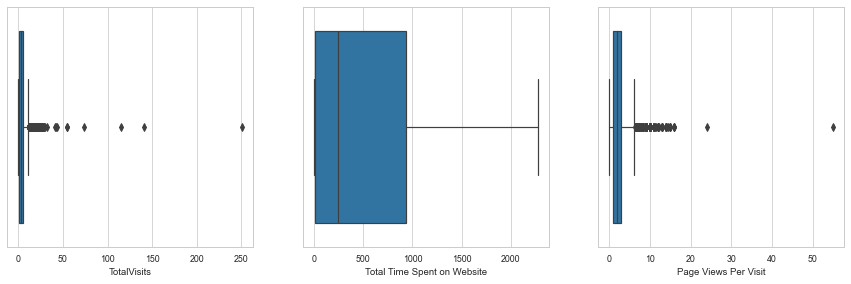

In [267]:
plt.figure(figsize=(15,15))
for i in enumerate(leads_num.columns):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x=i[1],data=leads_num)

We could see that TotalVisits and Page Views Per Visits has Outliers. As mentioned above, we will impute it using IQR*1.5

In [268]:
# Checking statistical summary of TotalVisits

round(leads_df['TotalVisits'].describe(percentiles=[0.25,0.5,0.75,0.9,0.99,1]),2)

count    9103.00
mean        3.45
std         4.85
min         0.00
25%         1.00
50%         3.00
75%         5.00
90%         7.00
99%        17.00
100%      251.00
max       251.00
Name: TotalVisits, dtype: float64

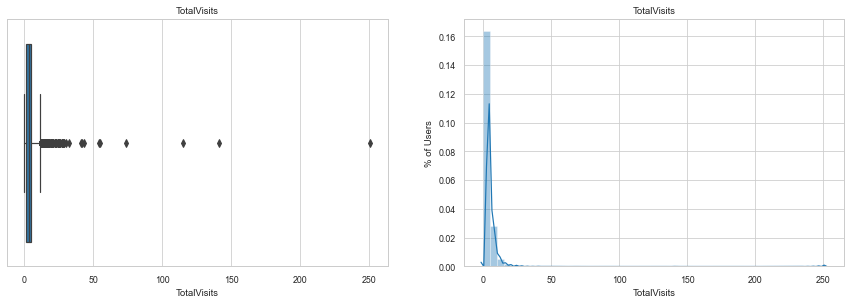

In [269]:
#Plotting before outlier Handling

plt.figure(figsize=(15, 10))

plt.subplot(221)
sns.boxplot(leads_df['TotalVisits'])
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)

plt.subplot(222)
sns.distplot(leads_df['TotalVisits'].dropna())
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)
plt.ylabel('% of Users')
plt.show()

In [270]:
# replacing the outlier  (Q3 + 1.5*IQR) with 1.5*IQR

leads_df.loc[leads_df['TotalVisits'] > 11, 'TotalVisits'] = 6

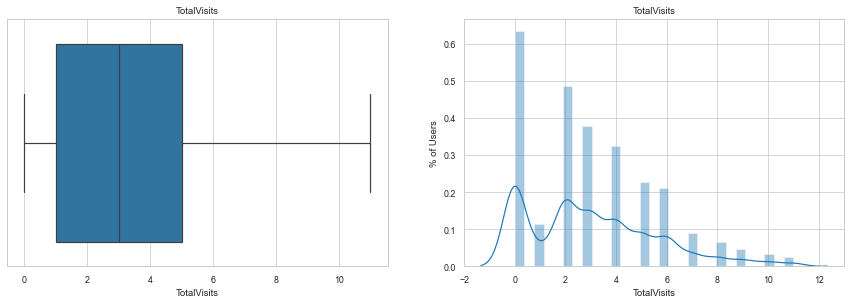

In [271]:
#Plotting after outlier Handling

plt.figure(figsize=(15, 10))

plt.subplot(221)
sns.boxplot(leads_df['TotalVisits'])
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)

plt.subplot(222)
sns.distplot(leads_df['TotalVisits'].dropna())
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)
plt.ylabel('% of Users')
plt.show()

In [272]:
# Checking values at major percentiles
round(leads_df['Page Views Per Visit'].describe(percentiles=[0.25,0.5,0.75,0.9,0.99,1]),2)

count    9103.00
mean        2.36
std         2.16
min         0.00
25%         1.00
50%         2.00
75%         3.00
90%         5.00
99%         9.00
100%       55.00
max        55.00
Name: Page Views Per Visit, dtype: float64

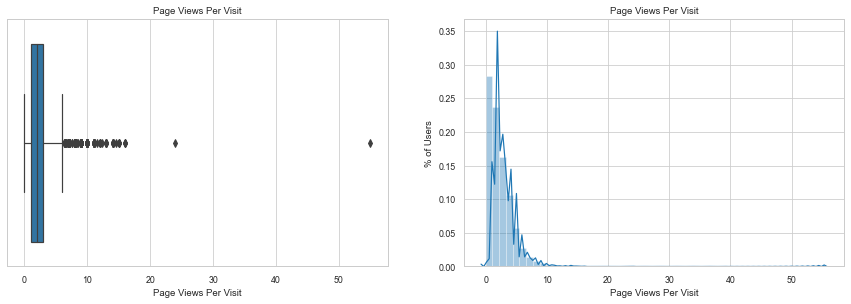

In [273]:
#Plotting before Outlier Handling

plt.figure(figsize=(15, 10))

plt.subplot(221)
sns.boxplot(leads_df['Page Views Per Visit'])
plt.title('Page Views Per Visit')
plt.xlabel('Page Views Per Visit')
plt.xticks(rotation= 0)
 
plt.subplot(222)
sns.distplot(leads_df['Page Views Per Visit'].dropna())
plt.title('Page Views Per Visit')
plt.xlabel('Page Views Per Visit')
plt.xticks(rotation= 0)
plt.ylabel('% of Users')
plt.show()

In [274]:
# replacing the outlier  (Q3 + 1.5*IQR) with 1.5*IQR

leads_df.loc[leads_df['Page Views Per Visit'] > 6, 'Page Views Per Visit'] = 3

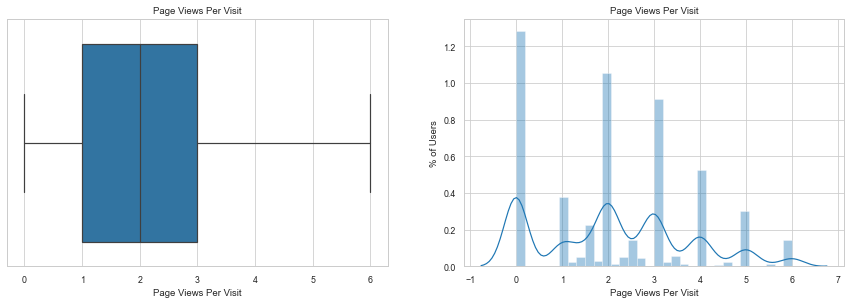

In [275]:
#Plotting after Outlier Handling

plt.figure(figsize=(15, 10))

plt.subplot(221)
sns.boxplot(leads_df['Page Views Per Visit'])
plt.title('Page Views Per Visit')
plt.xlabel('Page Views Per Visit')
plt.xticks(rotation= 0)
 
plt.subplot(222)
sns.distplot(leads_df['Page Views Per Visit'].dropna())
plt.title('Page Views Per Visit')
plt.xlabel('Page Views Per Visit')
plt.xticks(rotation= 0)
plt.ylabel('% of Users')
plt.show()

# Creating Final Dataframe by excluding the 'drop_list' columns

In [276]:
leads_df.shape

(9240, 30)

In [277]:
drop_list

['Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Do Not Email',
 'Search',
 'What matters most to you in choosing a course',
 'Country',
 'What is your current occupation',
 'Prospect ID',
 'Lead Number']

In [278]:
leads_df2=leads_df[leads_df.columns[~leads_df.columns.isin(drop_list)]]

In [279]:
leads_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   Tags                                    9240 non-null   object 
 9   City                                    9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [280]:
#checking percentage of null values in each columns

round(100*(leads_df2.isnull().sum()/len(leads_df2.index)), 2)

Lead Origin                               0.00
Lead Source                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             0.00
Specialization                            0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [281]:
#Dropping NULL value rows from the columns 'TotalVisits' & 'Page Views Per Visit'

leads_df2=leads_df2.dropna(subset=['Page Views Per Visit','TotalVisits'])

In [282]:
#checking null values in each columns

leads_df2.isnull().sum()

Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

All the Null Values are removed, and we have our final dataframe. We will use this df for dummy value creation and standardization before building our final Model

# Dummy Variable Creation

In [283]:
#checking for categorical variables with 2 classes. We need to identify them and convert it to integer before applying Dummy

for col in leads_df2:
    print(leads_df2[col].value_counts(), '\n')

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64 

Google              2902
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Others                54
Name: Lead Source, dtype: int64 

0    5642
1    3461
Name: Converted, dtype: int64 

0.0     2189
2.0     1680
3.0     1306
4.0     1120
5.0      783
6.0      733
1.0      395
7.0      309
8.0      224
9.0      164
10.0     114
11.0      86
Name: TotalVisits, dtype: int64 

0       2193
60        19
75        18
127       18
74        17
        ... 
1235       1
1091       1
1043       1
1035       1
1891       1
Name: Total Time Spent on Website, Length: 1717, dtype: int64 

0.00    2189
2.00    1795
3.00    1556
4.00     896
1.00     651
5.00     517
1.50     306
6.00     244
2.50     241
3.50      94
1.33      66
1.67      60

In [284]:
 #Only 'A free copy of Mastering The Interview' variable has two class

leads_df2['A free copy of Mastering The Interview']=leads_df2['A free copy of Mastering The Interview'].map({'Yes': 1, "No": 0})    

In [285]:
leads_df2['A free copy of Mastering The Interview'].value_counts()

0    6215
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [286]:
# Converting 'A free copy of Mastering The Interview' to Integer

leads_df2['A free copy of Mastering The Interview']=leads_df2['A free copy of Mastering The Interview'].astype("int64")

In [287]:
#Creating the dummy values now for the columns

leads_df2 = pd.get_dummies(leads_df2, drop_first=True)

In [288]:
leads_df2.shape


(9103, 50)

In [289]:
leads_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 50 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Converted                                      9103 non-null   int64  
 1   TotalVisits                                    9103 non-null   float64
 2   Total Time Spent on Website                    9103 non-null   int64  
 3   Page Views Per Visit                           9103 non-null   float64
 4   A free copy of Mastering The Interview         9103 non-null   int64  
 5   Lead Origin_Landing Page Submission            9103 non-null   uint8  
 6   Lead Origin_Lead Add Form                      9103 non-null   uint8  
 7   Lead Origin_Lead Import                        9103 non-null   uint8  
 8   Lead Source_Google                             9103 non-null   uint8  
 9   Lead Source_Olark Chat                         9103 

# Test-Train Split

In [290]:
# Putting feature variable to X

X = leads_df2.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Interested in other courses,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,City_Others,City_Thane & Outskirts,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [291]:
# Putting response variable to y
y = leads_df2['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [292]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

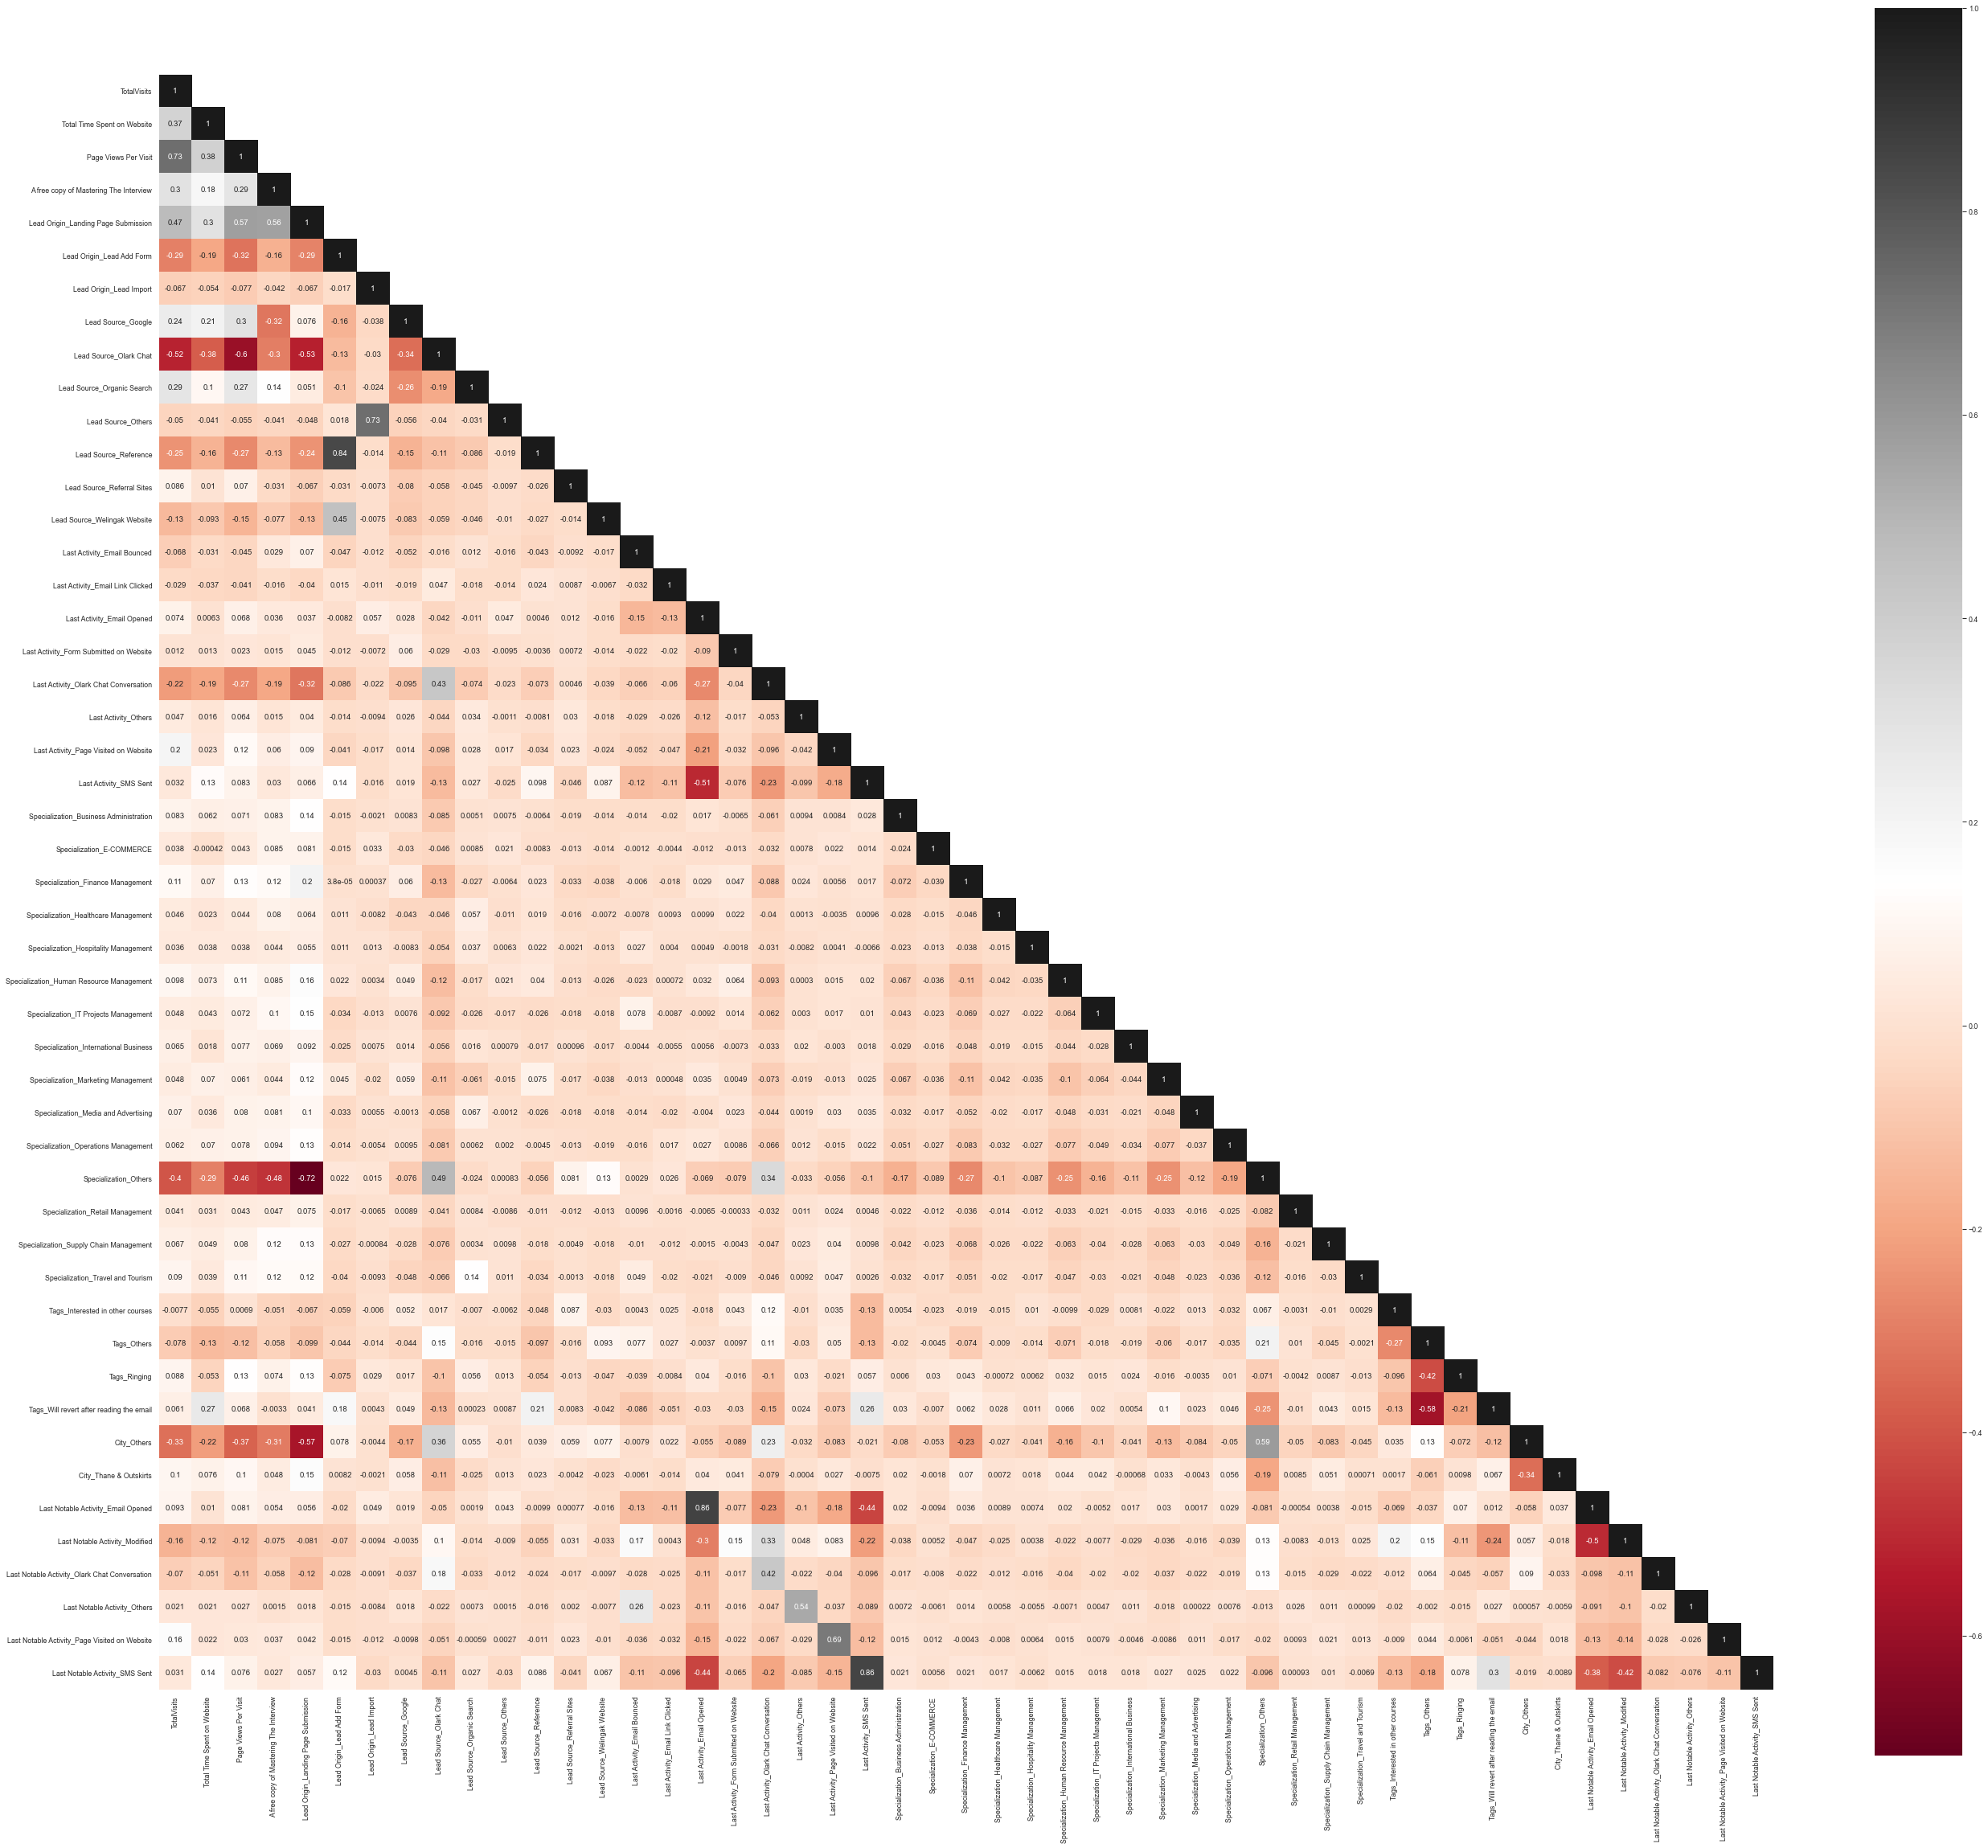

In [293]:
#Checking for correlation of dummy variables in the X_train
cor_mat= X_train.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(45,40)
sns.heatmap(cor_mat,mask=mask,square=True,annot=True,cbar=True,cmap="RdGy")
plt.show()



There seems to be few highly correlated variables. We will remove all highly correlated variables above 0.4 'r value'

In [294]:
#Dropping highly correlated dummy variables

X_train = X_train.drop(['Page Views Per Visit', 'Lead Origin_Landing Page Submission', 
                      'Lead Source_Olark Chat', 'Specialization_Others', 'City_Others', 
                      'Lead Source_Reference', 'Lead Source_Welingak Website', 'Lead Source_Others', 
                      'Last Activity_Olark Chat Conversation', 'Last Notable Activity_Email Opened',
                      'Last Notable Activity_SMS Sent', 'Last Activity_SMS Sent', 
                      'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Others', 
                      'Last Notable Activity_Page Visited on Website', 'Tags_Others'], axis=1)

X_test = X_test.drop(['Page Views Per Visit', 'Lead Origin_Landing Page Submission', 
                      'Lead Source_Olark Chat', 'Specialization_Others', 'City_Others', 
                      'Lead Source_Reference', 'Lead Source_Welingak Website', 'Lead Source_Others', 
                      'Last Activity_Olark Chat Conversation', 'Last Notable Activity_Email Opened',
                      'Last Notable Activity_SMS Sent', 'Last Activity_SMS Sent', 
                      'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Others', 
                      'Last Notable Activity_Page Visited on Website', 'Tags_Others'], 1)

In [295]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7282 entries, 9000 to 5734
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   TotalVisits                               7282 non-null   float64
 1   Total Time Spent on Website               7282 non-null   int64  
 2   A free copy of Mastering The Interview    7282 non-null   int64  
 3   Lead Origin_Lead Add Form                 7282 non-null   uint8  
 4   Lead Origin_Lead Import                   7282 non-null   uint8  
 5   Lead Source_Google                        7282 non-null   uint8  
 6   Lead Source_Organic Search                7282 non-null   uint8  
 7   Lead Source_Referral Sites                7282 non-null   uint8  
 8   Last Activity_Email Bounced               7282 non-null   uint8  
 9   Last Activity_Email Link Clicked          7282 non-null   uint8  
 10  Last Activity_Email Opened       

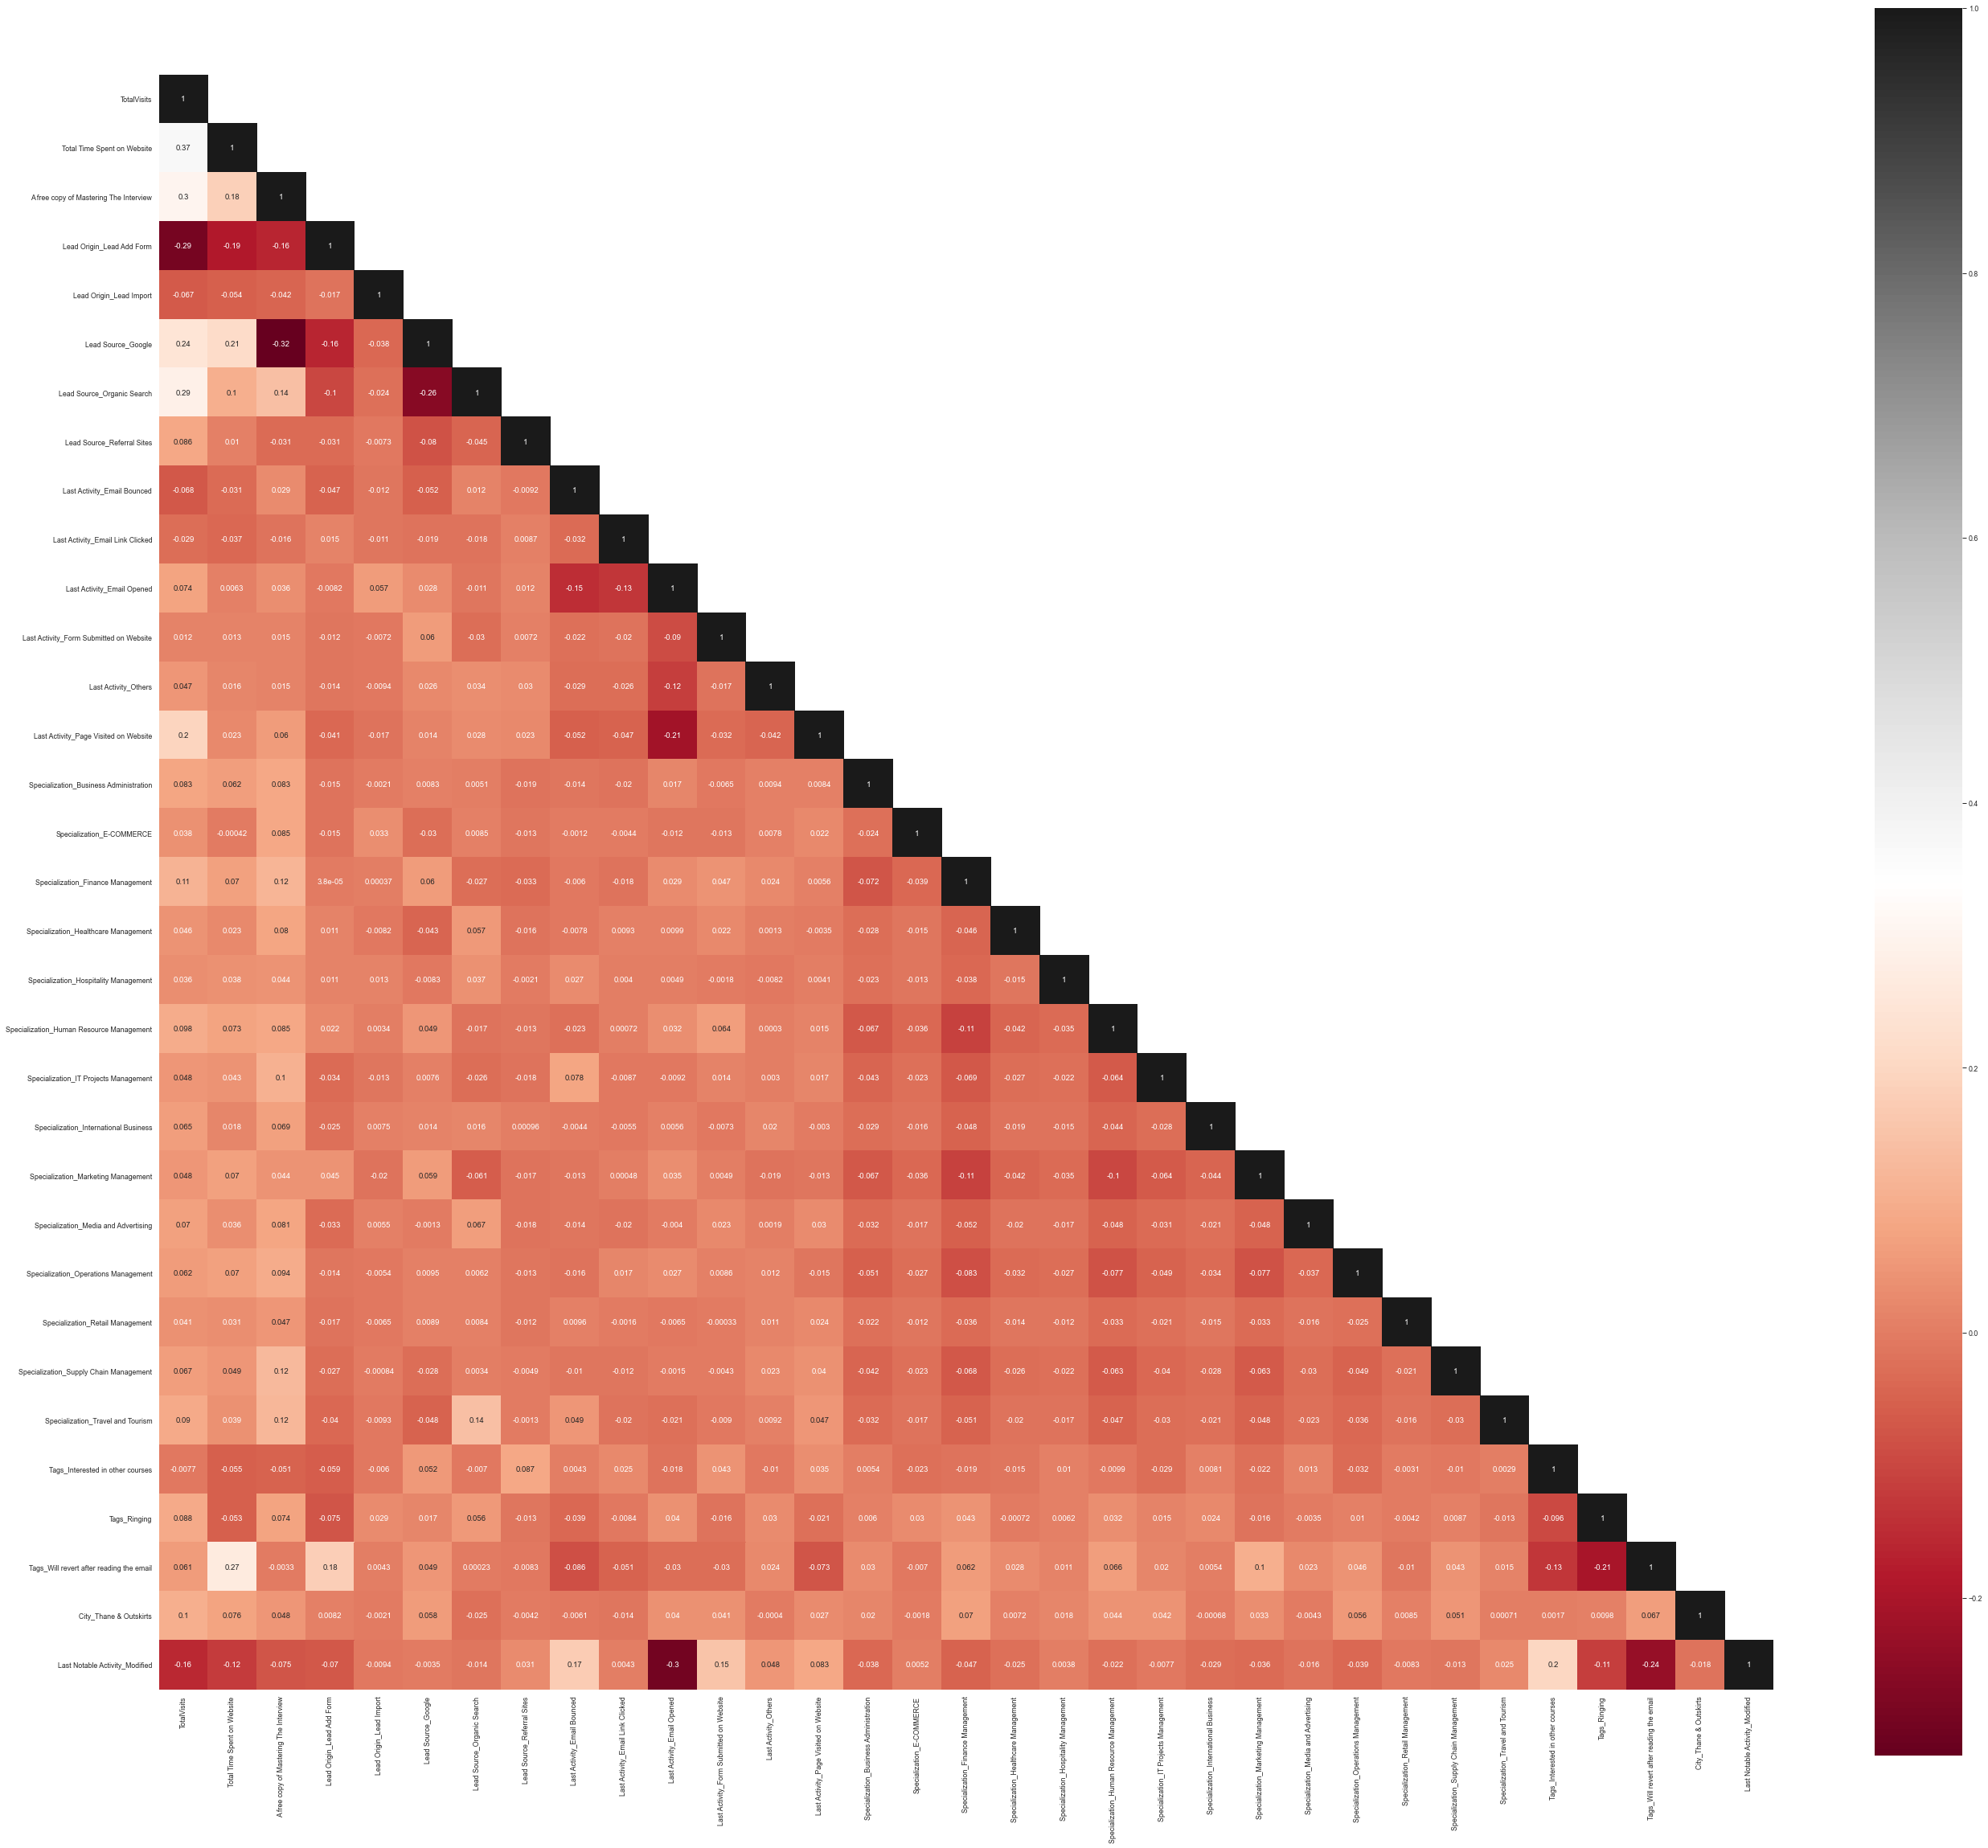

In [296]:
#Checking the correlation after dropping the variables


cor_mat= X_train.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(45,40)
sns.heatmap(cor_mat,mask=mask,square=True,annot=True,cbar=True,cmap="RdGy")
plt.show()


# Feature Scaling

In [297]:
X_train.head()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Others,Last Activity_Page Visited on Website,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,City_Thane & Outskirts,Last Notable Activity_Modified
9000,2.0,60,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6902,1.0,495,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7593,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1498,9.0,413,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4137,6.0,1049,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [298]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Others,Last Activity_Page Visited on Website,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,City_Thane & Outskirts,Last Notable Activity_Modified
count,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.00000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000,7282.000000
mean,3.080884,480.621121,0.315573,0.066465,0.003845,0.31928,0.127026,0.013595,0.034469,0.028152,0.376408,0.013183,0.022384,0.070173,0.042708,0.012634,0.105328,0.017303,0.012085,0.091458,0.039138,0.019088,0.091870,0.022659,0.055754,0.010711,0.038314,0.021835,0.058363,0.128811,0.221368,0.080472,0.358555
std,2.607116,545.541303,0.464775,0.249111,0.061894,0.46623,0.333024,0.115811,0.182442,0.165417,0.484517,0.114067,0.147939,0.255456,0.202212,0.111696,0.306997,0.130407,0.109271,0.288280,0.193936,0.136844,0.288863,0.148823,0.229462,0.102947,0.191966,0.146153,0.234445,0.335013,0.415196,0.272042,0.479609
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,8.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,243.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,919.500000,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,11.000000,2253.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [299]:
# Selecting the variables that needs to be scaled

var_to_scale=['TotalVisits','Total Time Spent on Website']

scaler = StandardScaler()

X_train[var_to_scale] = scaler.fit_transform(X_train[var_to_scale])

X_train.head()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Others,Last Activity_Page Visited on Website,Specialization_Business Administration,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,City_Thane & Outskirts,Last Notable Activity_Modified
9000,-0.414618,-0.771069,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6902,-0.798210,0.026359,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7593,-1.181802,-0.881059,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1498,2.270525,-0.123961,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4137,1.119749,1.041934,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# Model Building

In [300]:
import statsmodels.api as sm

In [301]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                            GLM   Df Residuals:                     7248
Model Family:                Binomial   Df Model:                           33
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2149.6
Date:                Sat, 06 Mar 2021   Deviance:                       4299.2
Time:                        10:32:31   Pearson chi2:                 9.66e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.1302      0.101     -1.295      0.195      -0.327       0.067
TotalVisits                                  0.0910      0.051      1.790      0.073      -0.009       0.191
Total Time Spent on Website                  1.0044      0.044     22.920      0.000       0.919       1.090
A free copy of Mastering The Interview      -0.3427      0.113     -3.034      0.002      -0.564      -0.121
Lead Origin_Lead Add Form                    4.4064      0.232     18.979      0.000       3.951       4.861
Lead Origin_Lead Import                      0.5848      0.667      0.877      0.380      -0.722       1.891
Lead Source_Google                          -0.2486      0.107     -2.317      0.020      -0.459      -0.038
Lead Source_Organic Search                  -0.1860      0.134     -1.388      0.165      -0.448       0.077
Lead Source_Referral Sites                  -0.7159      0.398     -1.797      0.072      -1.497       0.065
Last Activity_Email Bounced                 -2.0547      0.342     -6.015      0.000      -2.724      -1.385
Last Activity_Email Link Clicked            -0.7962      0.233     -3.416      0.001      -1.253      -0.339
Last Activity_Email Opened                  -0.6611      0.090     -7.373      0.000      -0.837      -0.485
Last Activity_Form Submitted on Website     -0.2825      0.354     -0.798      0.425      -0.976       0.411
Last Activity_Others                        -0.3350      0.288     -1.163      0.245      -0.900       0.230
Last Activity_Page Visited on Website       -0.9925      0.166     -5.986      0.000      -1.317      -0.668
Specialization_Business Administration      -0.1696      0.208     -0.817      0.414      -0.576       0.237
Specialization_E-COMMERCE                    0.1609      0.351      0.458      0.647      -0.527       0.849
Specialization_Finance Management           -0.1102      0.152     -0.728      0.467      -0.407       0.187
Specialization_Healthcare Management        -0.4927      0.332     -1.483      0.138      -1.144       0.158
Specialization_Hospitality Management       -0.4014      0.365     -1.100      0.271      -1.117       0.314
Specialization_Human Resource Management    -0.1059      0.160     -0.663      0.507      -0.419       0.207
Specialization_IT Projects Management       -0.0771      0.228     -0.338      0.735      -0.524       0.370
Specialization_International Business       -0.4556      0.303     -1.504      0.132      -1.049       0.138
Specialization_Marketing Management          0.0463      0.153      0.302      0.763      -0.254       0.347
Specialization_Media and Advertising        -0.1269      0.280     -0.454      0.650      -0.675       0.421
Specialization_Operations Manag

# Feature Selection Using RFE

In [302]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [303]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)


In [304]:
rfe.support_

array([False,  True, False,  True,  True, False, False,  True,  True,
        True,  True, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
        True,  True,  True,  True, False,  True])

In [305]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Organic Search', False, 10),
 ('Lead Source_Referral Sites', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 4),
 ('Last Activity_Others', False, 3),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Specialization_Business Administration', False, 11),
 ('Specialization_E-COMMERCE', False, 6),
 ('Specialization_Finance Management', False, 13),
 ('Specialization_Healthcare Management', True, 1),
 ('Specialization_Hospitality Management', False, 2),
 ('Specialization_Human Resource Management', False, 14),
 ('Specialization_IT Projects Management', False, 19),
 ('Specialization_Interna

In [306]:
col = X_train.columns[rfe.support_]

In [307]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Specialization_Healthcare Management',
       'Specialization_International Business',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

In [308]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'A free copy of Mastering The Interview',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Last Activity_Form Submitted on Website', 'Last Activity_Others',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Supply Chain Management', 'City_Thane & Outskirts'],
      dtype='object')

In [309]:
#Model 2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                            GLM   Df Residuals:                     7266
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2161.1
Date:                Sat, 06 Mar 2021   Deviance:                       4322.1
Time:                        10:32:35   Pearson chi2:                 9.50e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.3958      0.071     -5.592      0.000      -0.535      -0.257
Total Time Spent on Website                  0.9609      0.040     24.278      0.000       0.883       1.039
Lead Origin_Lead Add Form                    4.4667      0.226     19.785      0.000       4.024       4.909
Lead Origin_Lead Import                      0.6593      0.664      0.993      0.321      -0.642       1.961
Lead Source_Referral Sites                  -0.4984      0.393     -1.267      0.205      -1.270       0.273
Last Activity_Email Bounced                 -2.0372      0.339     -6.015      0.000      -2.701      -1.373
Last Activity_Email Link Clicked            -0.7677      0.233     -3.297      0.001      -1.224      -0.311
Last Activity_Email Opened                  -0.6588      0.088     -7.522      0.000      -0.830      -0.487
Last Activity_Page Visited on Website       -0.9480      0.160     -5.941      0.000      -1.261      -0.635
Specialization_Healthcare Management        -0.5243      0.318     -1.651      0.099      -1.147       0.098
Specialization_International Business       -0.4291      0.290     -1.480      0.139      -0.997       0.139
Specialization_Travel and Tourism           -0.8537      0.300     -2.846      0.004      -1.442      -0.266
Tags_Interested in other courses            -2.4274      0.330     -7.360      0.000      -3.074      -1.781
Tags_Ringing                                -3.3719      0.233    -14.471      0.000      -3.829      -2.915
Tags_Will revert after reading the email     4.1521      0.158     26.323      0.000       3.843       4.461
Last Notable Activity_Modified              -1.1261      0.089    -12.647      0.000      -1.301      -0.952
============================================================================================================
"""

### Checking VIFs

In [310]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
14,Last Notable Activity_Modified,1.31
13,Tags_Will revert after reading the email,1.29
6,Last Activity_Email Opened,1.22
1,Lead Origin_Lead Add Form,1.18
0,Total Time Spent on Website,1.16
11,Tags_Interested in other courses,1.13
12,Tags_Ringing,1.10
4,Last Activity_Email Bounced,1.08
7,Last Activity_Page Visited on Website,1.08
10,Specialization_Travel and Tourism,1.03


Removing the "Lead Origin_Lead Import" as it has p-value and becomes insignificant for our analysis

In [311]:
col=col.drop("Lead Origin_Lead Import",1)

In [312]:
#Building our third model after removing the variable with Insignificant P Value

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm3_model = logm3.fit()
logm3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                            GLM   Df Residuals:                     7267
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2161.5
Date:                Sat, 06 Mar 2021   Deviance:                       4323.1
Time:                        10:32:40   Pearson chi2:                 9.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.3949      0.071     -5.580      0.000      -0.534      -0.256
Total Time Spent on Website                  0.9588      0.040     24.271      0.000       0.881       1.036
Lead Origin_Lead Add Form                    4.4620      0.226     19.773      0.000       4.020       4.904
Lead Source_Referral Sites                  -0.5007      0.394     -1.272      0.203      -1.272       0.271
Last Activity_Email Bounced                 -2.0378      0.339     -6.017      0.000      -2.702      -1.374
Last Activity_Email Link Clicked            -0.7687      0.233     -3.301      0.001      -1.225      -0.312
Last Activity_Email Opened                  -0.6561      0.088     -7.496      0.000      -0.828      -0.485
Last Activity_Page Visited on Website       -0.9487      0.160     -5.946      0.000      -1.261      -0.636
Specialization_Healthcare Management        -0.5262      0.318     -1.656      0.098      -1.149       0.096
Specialization_International Business       -0.4258      0.289     -1.473      0.141      -0.993       0.141
Specialization_Travel and Tourism           -0.8557      0.300     -2.851      0.004      -1.444      -0.268
Tags_Interested in other courses            -2.4274      0.330     -7.362      0.000      -3.074      -1.781
Tags_Ringing                                -3.3700      0.233    -14.463      0.000      -3.827      -2.913
Tags_Will revert after reading the email     4.1576      0.158     26.363      0.000       3.848       4.467
Last Notable Activity_Modified              -1.1255      0.089    -12.641      0.000      -1.300      -0.951
============================================================================================================
"""

In [313]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
13,Last Notable Activity_Modified,1.31
12,Tags_Will revert after reading the email,1.29
5,Last Activity_Email Opened,1.22
1,Lead Origin_Lead Add Form,1.17
0,Total Time Spent on Website,1.16
10,Tags_Interested in other courses,1.13
11,Tags_Ringing,1.10
3,Last Activity_Email Bounced,1.08
6,Last Activity_Page Visited on Website,1.08
9,Specialization_Travel and Tourism,1.03


We will remove 'Lead Source_Referral Sites' as this variable has an 'Insiginificant P Value'

In [314]:
col=col.drop("Lead Source_Referral Sites",1)

In [315]:
#Building our fourth model after removing the variable with Insignificant P Value

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm4_model = logm4.fit()
logm4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                            GLM   Df Residuals:                     7268
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2162.4
Date:                Sat, 06 Mar 2021   Deviance:                       4324.8
Time:                        10:32:41   Pearson chi2:                 9.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.3995      0.071     -5.650      0.000      -0.538      -0.261
Total Time Spent on Website                  0.9588      0.040     24.271      0.000       0.881       1.036
Lead Origin_Lead Add Form                    4.4676      0.226     19.799      0.000       4.025       4.910
Last Activity_Email Bounced                 -2.0342      0.339     -6.007      0.000      -2.698      -1.370
Last Activity_Email Link Clicked            -0.7727      0.233     -3.322      0.001      -1.229      -0.317
Last Activity_Email Opened                  -0.6577      0.088     -7.516      0.000      -0.829      -0.486
Last Activity_Page Visited on Website       -0.9546      0.160     -5.983      0.000      -1.267      -0.642
Specialization_Healthcare Management        -0.5205      0.318     -1.639      0.101      -1.143       0.102
Specialization_International Business       -0.4209      0.289     -1.455      0.146      -0.988       0.146
Specialization_Travel and Tourism           -0.8536      0.300     -2.849      0.004      -1.441      -0.266
Tags_Interested in other courses            -2.4505      0.329     -7.438      0.000      -3.096      -1.805
Tags_Ringing                                -3.3672      0.233    -14.449      0.000      -3.824      -2.910
Tags_Will revert after reading the email     4.1553      0.158     26.358      0.000       3.846       4.464
Last Notable Activity_Modified              -1.1250      0.089    -12.634      0.000      -1.299      -0.950
============================================================================================================
"""

In [316]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
12,Last Notable Activity_Modified,1.30
11,Tags_Will revert after reading the email,1.29
4,Last Activity_Email Opened,1.22
1,Lead Origin_Lead Add Form,1.17
0,Total Time Spent on Website,1.16
9,Tags_Interested in other courses,1.12
10,Tags_Ringing,1.10
2,Last Activity_Email Bounced,1.08
5,Last Activity_Page Visited on Website,1.07
8,Specialization_Travel and Tourism,1.03


We will remove 'Specialization_International Business' as this variable has an 'Insiginificant P Value'

In [317]:
col =col.drop("Specialization_International Business",1)

In [318]:
#Building our fifth model after removing the variable with Insignificant P Value

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm5_model = logm5.fit()
logm5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                            GLM   Df Residuals:                     7269
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2163.5
Date:                Sat, 06 Mar 2021   Deviance:                       4327.0
Time:                        10:32:42   Pearson chi2:                 9.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4084      0.070     -5.798      0.000      -0.546      -0.270
Total Time Spent on Website                  0.9563      0.039     24.249      0.000       0.879       1.034
Lead Origin_Lead Add Form                    4.4648      0.225     19.820      0.000       4.023       4.906
Last Activity_Email Bounced                 -2.0276      0.338     -5.993      0.000      -2.691      -1.365
Last Activity_Email Link Clicked            -0.7751      0.233     -3.331      0.001      -1.231      -0.319
Last Activity_Email Opened                  -0.6579      0.087     -7.520      0.000      -0.829      -0.486
Last Activity_Page Visited on Website       -0.9531      0.159     -5.978      0.000      -1.266      -0.641
Specialization_Healthcare Management        -0.5105      0.317     -1.609      0.108      -1.132       0.111
Specialization_Travel and Tourism           -0.8443      0.299     -2.820      0.005      -1.431      -0.257
Tags_Interested in other courses            -2.4485      0.329     -7.439      0.000      -3.094      -1.803
Tags_Ringing                                -3.3674      0.233    -14.438      0.000      -3.825      -2.910
Tags_Will revert after reading the email     4.1513      0.158     26.345      0.000       3.842       4.460
Last Notable Activity_Modified              -1.1214      0.089    -12.604      0.000      -1.296      -0.947
============================================================================================================
"""

In [319]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_Modified,1.30
10,Tags_Will revert after reading the email,1.29
4,Last Activity_Email Opened,1.21
1,Lead Origin_Lead Add Form,1.17
0,Total Time Spent on Website,1.16
8,Tags_Interested in other courses,1.12
9,Tags_Ringing,1.10
2,Last Activity_Email Bounced,1.08
5,Last Activity_Page Visited on Website,1.07
7,Specialization_Travel and Tourism,1.03


We will remove 'Specialization_Healthcare Management' as this variable has an 'Insiginificant P Value'

In [320]:
col=col.drop("Specialization_Healthcare Management",1)

In [321]:
#Build our sixth model after removing the variable with Insignificant P Value

X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm6_model = logm6.fit()
logm6_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                            GLM   Df Residuals:                     7270
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2164.8
Date:                Sat, 06 Mar 2021   Deviance:                       4329.7
Time:                        10:32:43   Pearson chi2:                 9.29e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4190      0.070     -5.977      0.000      -0.556      -0.282
Total Time Spent on Website                  0.9544      0.039     24.223      0.000       0.877       1.032
Lead Origin_Lead Add Form                    4.4630      0.225     19.807      0.000       4.021       4.905
Last Activity_Email Bounced                 -2.0255      0.338     -5.994      0.000      -2.688      -1.363
Last Activity_Email Link Clicked            -0.7772      0.233     -3.339      0.001      -1.233      -0.321
Last Activity_Email Opened                  -0.6567      0.087     -7.509      0.000      -0.828      -0.485
Last Activity_Page Visited on Website       -0.9504      0.159     -5.972      0.000      -1.262      -0.638
Specialization_Travel and Tourism           -0.8347      0.299     -2.791      0.005      -1.421      -0.249
Tags_Interested in other courses            -2.4422      0.329     -7.424      0.000      -3.087      -1.797
Tags_Ringing                                -3.3614      0.233    -14.423      0.000      -3.818      -2.905
Tags_Will revert after reading the email     4.1464      0.157     26.328      0.000       3.838       4.455
Last Notable Activity_Modified              -1.1154      0.089    -12.557      0.000      -1.289      -0.941
============================================================================================================
"""

In [322]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Notable Activity_Modified,1.30
9,Tags_Will revert after reading the email,1.29
4,Last Activity_Email Opened,1.21
1,Lead Origin_Lead Add Form,1.17
0,Total Time Spent on Website,1.16
7,Tags_Interested in other courses,1.12
8,Tags_Ringing,1.10
2,Last Activity_Email Bounced,1.08
5,Last Activity_Page Visited on Website,1.07
6,Specialization_Travel and Tourism,1.03


## Predicted Values Using the Final Model (Model 6)

In [323]:
# Getting the predicted values on the train set
y_train_pred = logm6_model.predict(X_train_sm)

In [324]:
y_train_pred

9000    0.093612
6902    0.081707
7593    0.128237
1498    0.232540
4137    0.983129
          ...   
367     0.128954
82      0.891798
8173    0.101516
7055    0.952899
5734    0.006365
Length: 7282, dtype: float64

In [325]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09361186, 0.08170712, 0.12823739, 0.23253994, 0.98312949,
       0.99533967, 0.00507647, 0.95698636, 0.78758376, 0.41632835])

In [326]:
#Creating a dataframe with the actual Converted flag and the Predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted_IND':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect_IND'] = y_train.index
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND
0,0,0.093612,9000
1,0,0.081707,6902
2,0,0.128237,7593
3,0,0.232540,1498
4,1,0.983129,4137


In [327]:
#Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,Predicted
0,0,0.093612,9000,0
1,0,0.081707,6902,0
2,0,0.128237,7593,0
3,0,0.232540,1498,0
4,1,0.983129,4137,1


# Creating a Confusion Matrix

In [328]:
from sklearn import metrics

def draw_cm( actual, predicted ): 
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    sns.heatmap(cm, annot=True, fmt='.2f', cmap="Reds",
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()
    

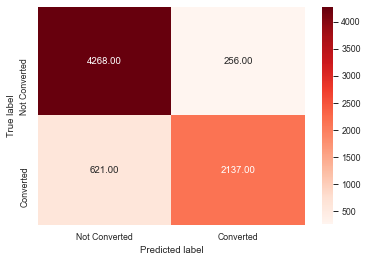

In [329]:
#Invoking the function

draw_cm( y_train_pred_final.Converted_IND, y_train_pred_final.Predicted)


In [330]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted_IND, y_train_pred_final.Predicted))

0.8795660532820654


In [331]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted_IND, y_train_pred_final.Predicted )
confusion

array([[4268,  256],
       [ 621, 2137]], dtype=int64)

In [332]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [333]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7748368382886149

In [334]:
# Let us calculate specificity
TN / float(TN+FP)

0.9434129089301503

In [335]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05658709106984969


In [336]:
# positive predictive value 
print (TP / float(TP+FP))

0.893021312160468


In [337]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8729801595418286


# Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [338]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [339]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted_IND, y_train_pred_final.Converted_Prob, drop_intermediate = False )

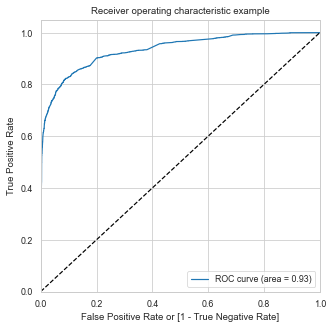

In [340]:
draw_roc(y_train_pred_final.Converted_IND, y_train_pred_final.Converted_Prob)

###  Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [341]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.093612,9000,0,1,0,0,0,0,0,0,0,0,0
1,0,0.081707,6902,0,1,0,0,0,0,0,0,0,0,0
2,0,0.128237,7593,0,1,1,0,0,0,0,0,0,0,0
3,0,0.232540,1498,0,1,1,1,0,0,0,0,0,0,0
4,1,0.983129,4137,1,1,1,1,1,1,1,1,1,1,1


In [342]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted_IND, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378742  1.000000  0.000000
0.1   0.1  0.684702  0.965555  0.513484
0.2   0.2  0.825872  0.908267  0.775641
0.3   0.3  0.868031  0.843727  0.882847
0.4   0.4  0.877369  0.808920  0.919098
0.5   0.5  0.879566  0.774837  0.943413
0.6   0.6  0.875309  0.736041  0.960212
0.7   0.7  0.868580  0.693619  0.975243
0.8   0.8  0.858967  0.649384  0.986737
0.9   0.9  0.841939  0.594634  0.992706


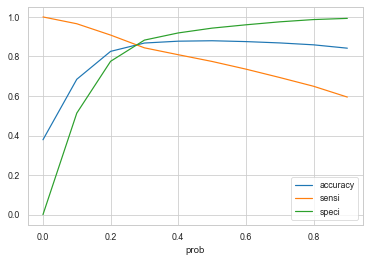

In [343]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set_style("whitegrid")
sns.set_context("paper")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

## From the curve above, 0.27 is the optimum point to take it as a threshold.

In [344]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.27 else 0)

y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.093612,9000,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.081707,6902,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.128237,7593,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.232540,1498,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.983129,4137,1,1,1,1,1,1,1,1,1,1,1,1


In [345]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted)

0.8630870639934084

In [346]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted )
confusion2

array([[3929,  595],
       [ 402, 2356]], dtype=int64)

In [347]:
def draw_cm( actual, predicted ): 
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    sns.heatmap(cm, annot=True, fmt='.2f', cmap="Oranges",
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()

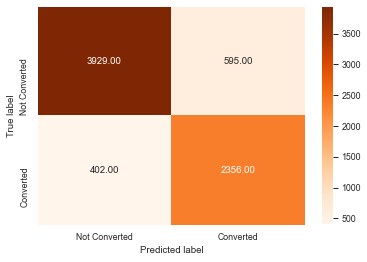

In [348]:
#Invoking the function
draw_cm( y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted)

In [349]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [350]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8542422044960116

In [351]:
# Let us calculate specificity
TN / float(TN+FP)

0.8684792219274978

In [352]:
# Calculate false postive rate - predicting converted when customer has not converted
print(FP/ float(TN+FP))

0.1315207780725022


In [353]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7983734327346662


In [354]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9071807896559686


## Precision and Recall

In [355]:
#Precision
# TP / TP + FP

confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7983734327346662

In [356]:
#Recall
#TP / TP + FN
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8542422044960116

In [357]:
#Using sklearn utilities for the same
from sklearn.metrics import precision_score, recall_score

In [358]:
#Precision Value
precision_score(y_train_pred_final.Converted_IND, y_train_pred_final.Predicted)

0.893021312160468

In [359]:
#Recall Value
recall_score(y_train_pred_final.Converted_IND, y_train_pred_final.Predicted)

0.7748368382886149

## Precision and Recall trade-off

For our Business Problem, The appropriate Metrics to be use will be Recall and Precision.

Because this will help us to identify the predicted CONVERTED is actual CONVERTED and
Probability that an actual CONVERTED case is predicted correctly.
So we will use the Precision-Recall trade off curve to identify the most optimised threshold.

In [360]:
from sklearn.metrics import precision_recall_curve

In [361]:
y_train_pred_final.Converted_IND, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 7277    0
 7278    1
 7279    1
 7280    1
 7281    0
 Name: Converted_IND, Length: 7282, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 7277    0
 7278    1
 7279    0
 7280    1
 7281    0
 Name: Predicted, Length: 7282, dtype: int64)

In [362]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted_IND, y_train_pred_final.Converted_Prob)


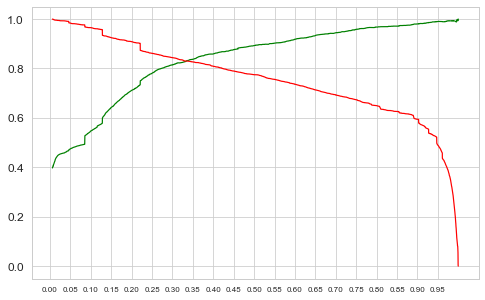

In [363]:
# Plotting the precision recall curve

plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)

plt.show()

In [364]:
#From the curve above, 0.34 is the optimum point to take it as a threshold

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.093612,9000,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.081707,6902,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.128237,7593,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.232540,1498,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.983129,4137,1,1,1,1,1,1,1,1,1,1,1,1


In [365]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted)

0.8728371326558638

In [366]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted )
confusion3

array([[4069,  455],
       [ 471, 2287]], dtype=int64)

In [367]:
def draw_cm( actual, predicted ): 
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    sns.heatmap(cm, annot=True, fmt='.2f', cmap="Purples",
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()

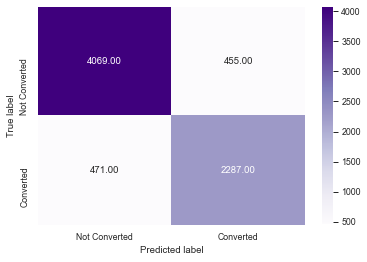

In [368]:
#Invoking the function
draw_cm( y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted)

In [369]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [370]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8292240754169689

In [371]:
# Let us calculate specificity
TN / float(TN+FP)

0.8994252873563219

In [372]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10057471264367816


In [373]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8340627279358133


In [374]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8962555066079295


In [375]:
#Precision
#TP / TP + FP

confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.8340627279358133

In [376]:
#Recall
#TP / TP + FN
confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])

0.8292240754169689

# Making predictions on the test set

In [377]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1821 entries, 3504 to 8487
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   TotalVisits                               1821 non-null   float64
 1   Total Time Spent on Website               1821 non-null   int64  
 2   A free copy of Mastering The Interview    1821 non-null   int64  
 3   Lead Origin_Lead Add Form                 1821 non-null   uint8  
 4   Lead Origin_Lead Import                   1821 non-null   uint8  
 5   Lead Source_Google                        1821 non-null   uint8  
 6   Lead Source_Organic Search                1821 non-null   uint8  
 7   Lead Source_Referral Sites                1821 non-null   uint8  
 8   Last Activity_Email Bounced               1821 non-null   uint8  
 9   Last Activity_Email Link Clicked          1821 non-null   uint8  
 10  Last Activity_Email Opened       

In [378]:
# Scaling the Test Set

X_test[var_to_scale] = scaler.transform(X_test[var_to_scale])

In [379]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

In [380]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Page Visited on Website,Specialization_Travel and Tourism,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified
3504,-0.103796,0,0,0,1,0,0,0,1,0,0
4050,-0.881059,1,0,0,0,0,0,0,0,1,0
7201,0.424156,0,0,0,0,0,0,0,0,0,0
1196,-0.105629,0,0,0,1,0,1,0,1,0,0
8219,-0.428267,0,0,0,0,1,0,0,0,0,0


In [381]:
X_test_sm = sm.add_constant(X_test)

In [382]:
X_test_sm.columns

Index(['const', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Page Visited on Website',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

# Making predictions

In [383]:
# Predicting the final test model 
y_test_pred = logm6_model.predict(X_test_sm)

In [384]:
y_test_pred[:10]

3504    0.010601
4050    0.999357
7201    0.496456
1196    0.004620
8219    0.144526
8747    0.128237
9048    0.753483
6524    0.111615
7693    0.268404
8187    0.460483
dtype: float64

In [385]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)

In [386]:
y_test_pred.head()

,0
3504,0.010601
4050,0.999357
7201,0.496456
1196,0.004620
8219,0.144526


In [387]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [388]:
y_test_df.head()

,Converted
3504,0
4050,1
7201,0
1196,0
8219,1


In [389]:
# Putting CustID to index
y_test_df['Prospect_IND'] = y_test_df.index

In [390]:
# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [392]:
# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)

In [393]:
y_pred_final.head()

,Converted,Prospect_IND,0
0,0,3504,0.010601
1,1,4050,0.999357
2,0,7201,0.496456
3,0,1196,0.004620
4,1,8219,0.144526


In [394]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final= y_pred_final.rename(columns={ 'Converted' : 'Converted_IND'})

In [395]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect_IND','Converted_IND','Converted_Prob'], axis=1)

In [396]:
y_pred_final.head()

,Prospect_IND,Converted_IND,Converted_Prob
0,3504,0,0.010601
1,4050,1,0.999357
2,7201,0,0.496456
3,1196,0,0.004620
4,8219,1,0.144526


In [397]:
#We use the Threshold .34 we got it from Precission & Recall Tradeoff step

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.34 else 0)

y_pred_final.head()

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted
0,3504,0,0.010601,0
1,4050,1,0.999357,1
2,7201,0,0.496456,1
3,1196,0,0.004620,0
4,8219,1,0.144526,0


In [398]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted_IND, y_pred_final.final_predicted)

0.8780889621087314

## Confusion Matrix (Test Prediction)

In [399]:
confusion_final = metrics.confusion_matrix(y_pred_final.Converted_IND, y_pred_final.final_predicted )
confusion_final

array([[1011,  107],
       [ 115,  588]], dtype=int64)

In [400]:
def draw_cm( actual, predicted ): 
    ## Cret
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    sns.heatmap(cm, annot=True, fmt='.2f', cmap="terrain",
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()

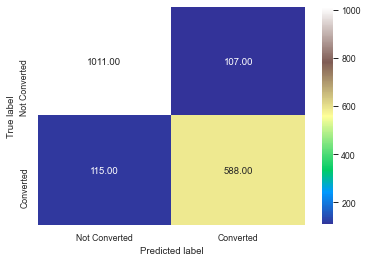

In [401]:
#Invoking the function
draw_cm( y_pred_final.Converted_IND, y_pred_final.final_predicted )

In [402]:
TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

In [403]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8364153627311522

In [404]:
# Let us calculate specificity
TN / float(TN+FP)

0.9042933810375671

In [405]:
#Precision
#TP / TP + FP

confusion_final[1,1]/(confusion_final[0,1]+confusion_final[1,1])

0.8460431654676259

In [406]:
#Recall
#TP / TP + FN

confusion_final[1,1]/(confusion_final[1,0]+confusion_final[1,1])


0.8364153627311522

# ROC curve (Area Under Curve)

In [407]:
# Function to draw ROC Curve

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs,
                                             drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [408]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.Converted_IND,
                                         y_pred_final.Converted_Prob, drop_intermediate=False)

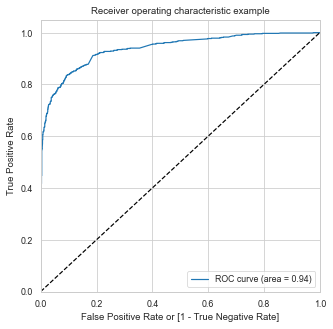

In [409]:
# Invoking the function to draw ROC curve

draw_roc( y_pred_final.Converted_IND, y_pred_final.Converted_Prob)

In [423]:
#Lead Scoring

y_pred_final

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted,lead_score
0,3504,0,0.010601,0,1
1,4050,1,0.999357,1,99
2,7201,0,0.496456,1,49
3,1196,0,0.004620,0,0
4,8219,1,0.144526,0,14
...,...,...,...,...,...
1816,643,1,0.040992,0,4
1817,7424,1,0.968648,1,96
1818,1529,1,0.604120,1,60
1819,7525,1,0.999357,1,99


In [422]:
y_pred_final['lead_score']=(y_pred_final['Converted_Prob']*100).astype("int64")
y_pred_final.sort_values(by='lead_score',ascending=False)

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted,lead_score
910,4297,1,0.995004,1,99
274,6170,1,0.995728,1,99
1398,8597,1,0.994699,1,99
1395,5692,1,0.997428,1,99
989,9169,1,0.992945,1,99
...,...,...,...,...,...
1461,550,0,0.003453,0,0
847,4870,0,0.005076,0,0
848,1303,0,0.008699,0,0
1679,4372,0,0.006776,0,0


# Top Features/Predictors

In [411]:
# Getting the parameters from final Model (Model 6)
final_parameters = logm6_model.params[1:]
final_parameters

Total Time Spent on Website                 0.954446
Lead Origin_Lead Add Form                   4.462952
Last Activity_Email Bounced                -2.025522
Last Activity_Email Link Clicked           -0.777240
Last Activity_Email Opened                 -0.656699
Last Activity_Page Visited on Website      -0.950425
Specialization_Travel and Tourism          -0.834730
Tags_Interested in other courses           -2.442211
Tags_Ringing                               -3.361416
Tags_Will revert after reading the email    4.146415
Last Notable Activity_Modified             -1.115355
dtype: float64

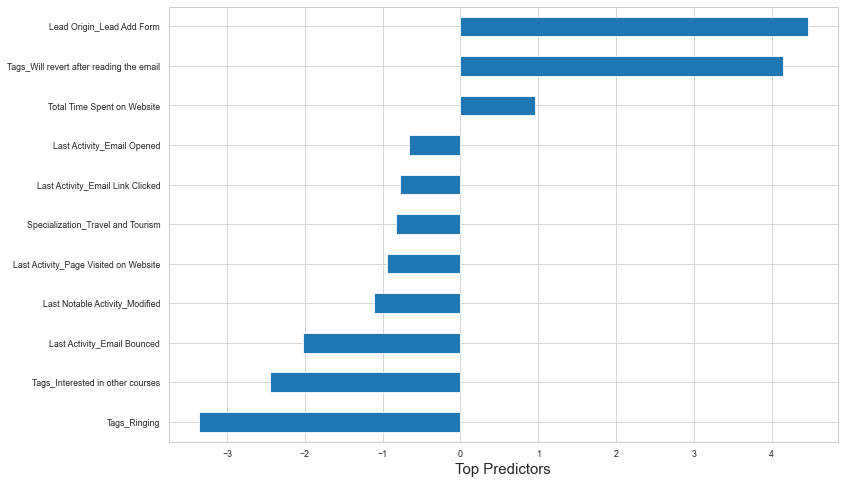

In [421]:
plt.figure(figsize = (12,8))
logm6_model.params[1:].sort_values(ascending = True).plot.barh()
plt.xlabel('Top Predictors', fontsize=15)
plt.show()

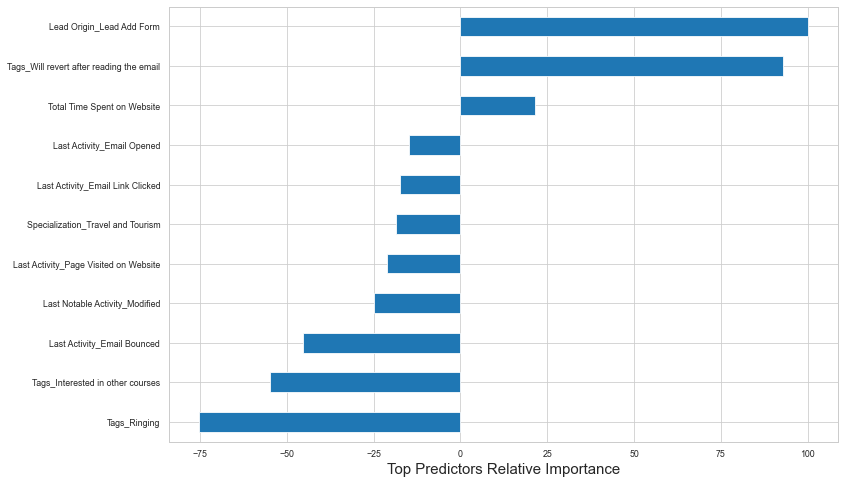

In [420]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
top_predictors = 100.0 * (final_parameters / final_parameters.max())
plt.figure(figsize = (12,8))
top_predictors.sort_values(ascending = True).plot.barh()
plt.xlabel('Top Predictors Relative Importance', fontsize=15)
plt.show()

# Conclusion

### ~84% of Recall value indicates that our model is able to predict 84% of actual conversion cases correctly

### ~85% of Precision value indicates that 85% of the conversions that our model predicted is actually converted.